# Clasificación de setas

Clasificación de 23 especies distintas en venenosas ("p" de poisonous) y comestibles ("e" de edible").

Tenéis que crear un Jupyter Notebook y realizar el proyecto en el mismo. Para ello, deberéis utilizar el dataset que os llegó al correo.

Realizar un análisis del dataset y tenéis que redactar las conclusiones que habéis obtenido de análisis exploratorio.

Para ello, podéis basaros en los dos notebooks que utilizastéis en el laboratorio y la siguiente guía.

## Guía

*No es necesario cubrir todos estos conceptos en todos los datasets, pero conviene tenerlos en mente. Puede que algunos conceptos no se puedan aplicar con todos los tipos de datos. Aparte de estos conceptos básicos, es importante intentar encontrar patrones en este primer análisis.

1. En primer lugar, hay que tener en cuenta que existen objetivos generales y específicos para la comprensión de los datos. Una parte importante de la comprensión de los datos es hacerse una idea de la calidad de los datos. Hay problemas de calidad de datos como la precisión sintáctica que son fáciles de comprobar.

2. Los valores atípicos son otro problema, y existen varios métodos para apoyar la identificación de valores atípicos. Aparte de los métodos diseñados exclusivamente para la detección de valores atípicos, podéis utilizar técnicas de visualización como boxplots, histogramas, diagramas de dispersión (o proyecciones basadas en PCA) que pueden ayudar a encontrar valores atípicos pero que también son útiles para otros propósitos.

3. Low valores faltantes son otra preocupación de la calidad de los datos. Cuando hay faltas explícitas es decir, las entradas que están marcadas directamente como faltantes, se debería tratar de averiguar de qué tipo son. Esto puede requerir conocimiento del dominio o se podrían deducir sin ese conocimiento. También debemos ser conscientes de que pueden existir valores atípicos que no estén marcados explicitamente. El caso más simple puede ser el de los valores atípicos que tienen un valor por defecto. Los histogramas podrían ayudar a identificar estos valores. No existe un técnica estándar para identificarlos.

4. Aparte de estos problemas de calidad de los datos, la comprensión de los datos también debería ayudar a descubrir nuevas o confirmar las dependencias o correlaciones esperadas entre atributos. Las gráficas de dispersión y el resto de técnicas vistas en clase pueden mostrar correlaciones entre pares de atributos.

5. Supuestos específicos dependientes de la aplicación - por ejemplo, la suposición de que un atributo específico sigue una distribución normal - también debe ser verificado durante la comprensión de los datos.

6. La representación de los datos no siempre puede comprobarse únicamente sobre la base de los datos, tenemos que comparar las estadísticas con nuestras expectativas. Si sospechamos que hay un cambio en un atributo numérico con el tiempo, podemos omparar los histogramas o boxplots para diferentes períodos de tiempo. Podemos hacer lo mismo con los gráficos de barras para atributos categóricos

7. Comprueba las distribuciones de cada atributo si son inusuales o inesperadas. Propiedades como los valores atípicos. ¿Son correctos los dominios o rangos? ¿Las medianas de los atributos numéricos son correctos? Esto debe hacerse sobre la base de histogramas y gráficos de caja para atributos continuos y gráficos de barras para atributos categóricos.

8. Comprobar correlaciones o dependencias entre pares de atributos con gráficos de dispersión. Para un pequeño número de atributos, inspeccionar gráficas de dispersión para todos los pares de atributos. Para un mayor número de atributos no hace falta generar gráficas para todos los pares, sino sólo para aquellos en los que se espera una dependencia o independencia específica.Además se pueden generar gráficas de dispersión para parejas elegidas al azar.

9. Aparte de estos puntos, en un problema de clasificación tendríamos que revisar que los datos estén balanceados. ¿Existe la misma cantidad de datos para todas las clases? 

Recordad que estos puntos son solo orientativos. La visualización y el análisis descriptivo serán distintos para cada problema y cada problema tendrá sus particularidades. Vuestro trabajo será obtener conclusiones y patrones de este primer análisis.

Una vez obtenidas las primeras conclusiones, quizás podráis desprenderos de variables innecesarias o crear nuevas variables basándoos en las variables iniciales.





## 1. Revisión de los datos originales

Clasificación de 23 especies distintas en venenosas ("p" de poisonous) y comestibles ("e" de edible"). Por lo tanto, se trata de un problema de clasificación.

Todos los valores de entrada son categóricos.
La salida es binaria, solo hay 2 valores posibles, "p" o "e".

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

file = "mushrooms.csv"

data = pd.read_csv(file, index_col=0)

## 2. Dimension del dataset


In [2]:
print(data.shape)

(8124, 24)


## 3. Tipos de datos de los atributos del dataset


In [3]:
print(data.dtypes)

stalk-color-below-ring      object
stalk-shape                 object
veil-type                   object
gill-spacing                object
class                       object
spore-print-color           object
stalk-surface-below-ring    object
ring-number                 object
cap-shape                   object
gill-attachment             object
ring-type                   object
bruises                     object
stalk-root                  object
stalk-surface-above-ring    object
gill-color                  object
stalk-color-above-ring      object
habitat                     object
population                  object
cap-surface                 object
veil-color                  object
cap-color                   object
odor                        object
gill-size                   object
d-var                       object
dtype: object


## 4. Distribución de las instancias de las clases del dataset

Podemos ver que hay un buen balanceo de las clases. Hay mitad y mitad de cada valor.

In [4]:
count_class = data.groupby("class").size()
print(count_class)

class
e    4208
p    3916
dtype: int64


## 5. Análisis descriptivo
Podemos ver que las siguientes columnas la mayoria tienen los mismos valores (las podemos borrar):
veil-type
ring-number
gill-attachment
veil-color

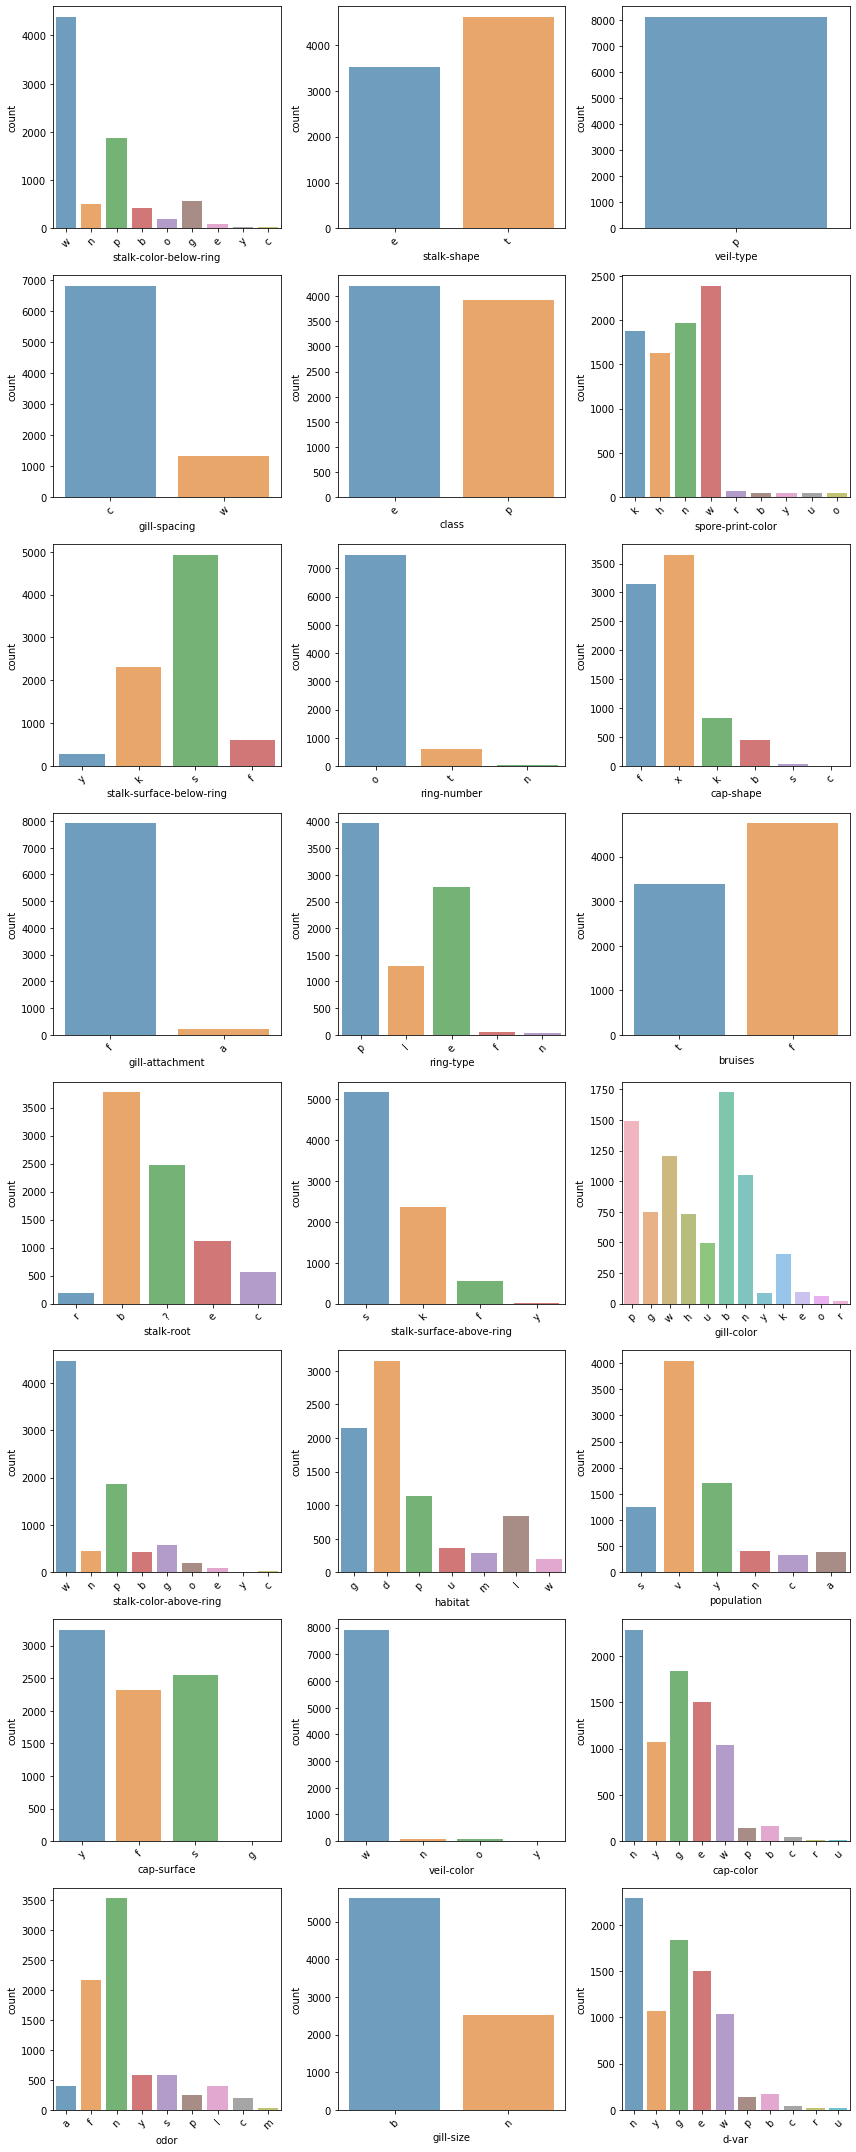

In [5]:
fig, axes = plt.subplots(round(len(data.columns) / 3), 3, figsize=(12, 30))
for i, ax in enumerate(fig.axes):
    if i < len(data.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=data.columns[i], alpha=0.7, data=data, ax=ax)
fig.tight_layout()

del_columns = ['veil-type', 'ring-number', 'gill-attachment', 'veil-color']

for col_name in del_columns:   
    if col_name in data:
        data.drop(col_name, axis=1, inplace=True)    
    

In [6]:
print(data.shape)

(8124, 20)


In [7]:
# en las gráficas podemos observar que en la columna stalk-root tenemos alrededor de 2500 valores con el valor '?'.
# procedemos a borrar las filas que tengan este valor.

for index, row in data.iterrows():
    if '?' in row.values:
        data.drop(index, axis=0, inplace=True)  
print(data.shape) 

(5644, 20)


In [8]:
# teniendo un dataset con todos lo valores categóricos completos, los convertimos en numéricos con LabelEncoder.
data = data.apply(LabelEncoder().fit_transform)

In [9]:
# correlación
correlations = data.corr()
print(correlations)

                          stalk-color-below-ring  stalk-shape  gill-spacing  \
stalk-color-below-ring                  1.000000     0.178907      0.302918   
stalk-shape                             0.178907     1.000000      0.314060   
gill-spacing                            0.302918     0.314060      1.000000   
class                                  -0.308613    -0.592446     -0.264160   
spore-print-color                       0.279251     0.177882      0.286257   
stalk-surface-below-ring                0.175700     0.019684     -0.266521   
cap-shape                              -0.029700     0.049043      0.051432   
ring-type                               0.182788     0.088685     -0.596261   
bruises                                 0.256369     0.348294     -0.439183   
stalk-root                              0.438528    -0.071345      0.467216   
stalk-surface-above-ring                0.190314     0.092470     -0.254180   
gill-color                              0.107444    

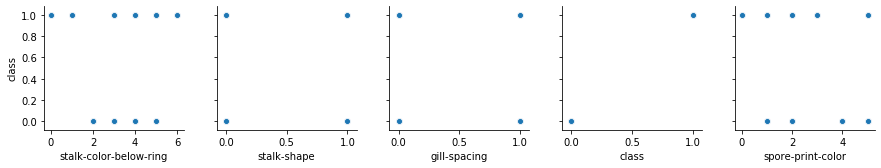

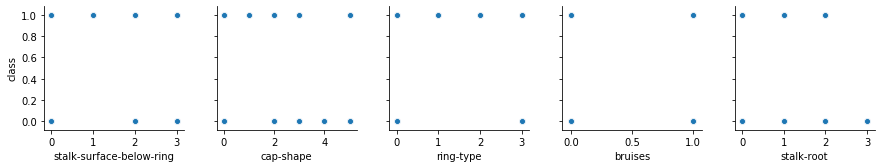

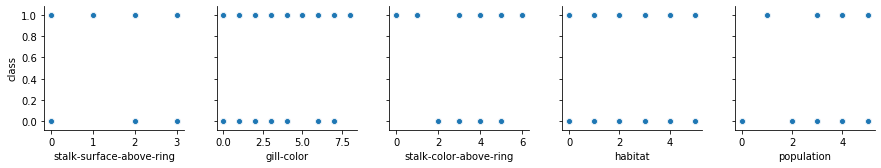

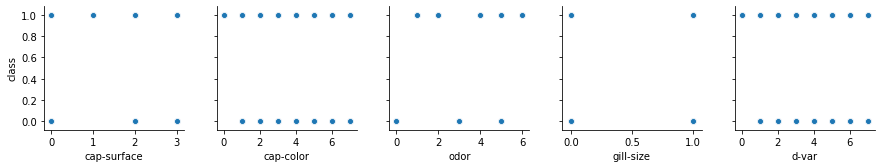

In [10]:
for i in range(0, len(data.columns), 5):
    sns.pairplot(data=data, x_vars=data.columns[i:i+5], y_vars=['class'])